In [14]:

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
red = pd.read_csv(r'C:\DataSet\winequality-red.csv', low_memory=False, sep=';')


In [16]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
white = pd.read_csv(r'C:\DataSet\winequality-white.csv', low_memory=False, sep=';')


In [18]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
# Function to select red or white dataset
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

In [20]:

# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



In [21]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:

white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine



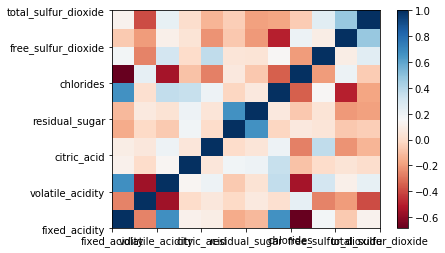


White Wine



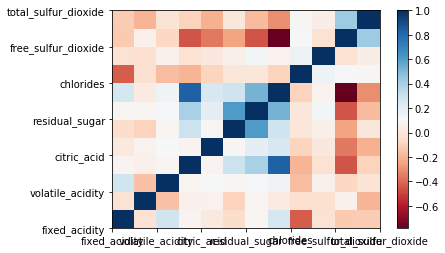

In [23]:
# Covarience matrix
def covmax(wine_set):
    cov_mat = wine_set.corr(method = 'pearson')
    fig = plt.figure().add_subplot(111)
    plt.pcolor(cov_mat, cmap = 'RdBu')
    plt.colorbar()
    fig.set_xticklabels(wine_set.columns)
    fig.set_yticklabels(wine_set.columns)
    plt.show()
call(covmax)

In [24]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [25]:

# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           4.97e-20
Time:                          00:32:21   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


Red Wine



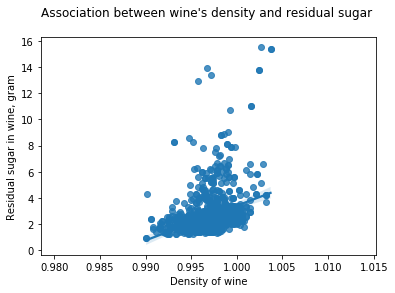

(0.3552833709833767, 9.013041728299896e-49)

White Wine



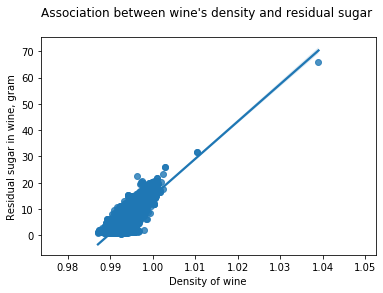

(0.8389664549045813, 0.0)


In [26]:
# Pearson Correlation
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

call(pearson)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.4051274774147372, 9.329990304725039e-31)

of `medium` quality
(0.3301725171944209, 9.754348168743506e-23)

of `high` quality
(0.5797231322874936, 0.01167920534189405)


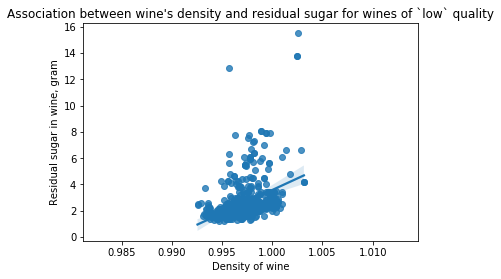

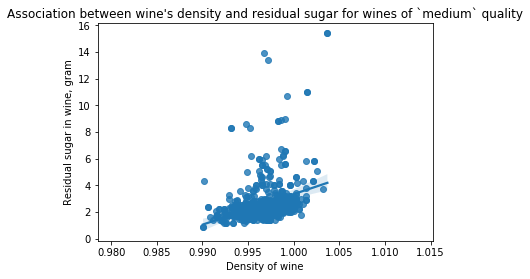

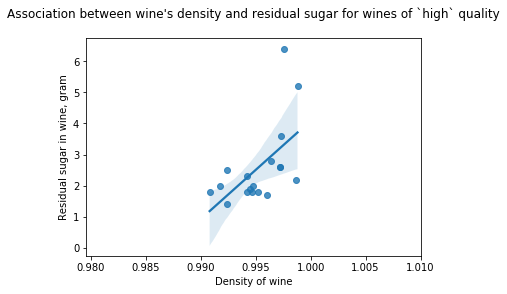


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829163, 0.0)

of `medium` quality
(0.8458419941200948, 0.0)

of `high` quality
(0.8210870208105546, 3.2743806268830606e-45)


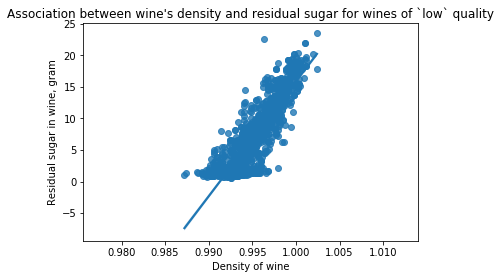

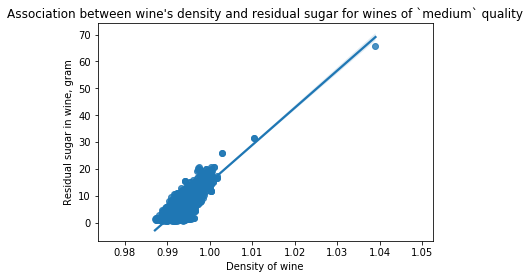

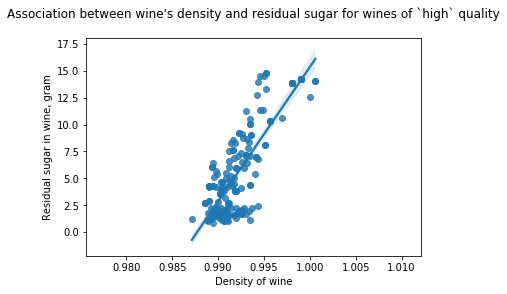

In [27]:
# Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)

In [29]:
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64




Red Wine



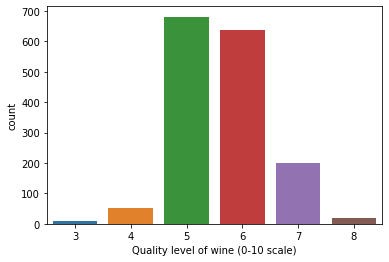


White Wine



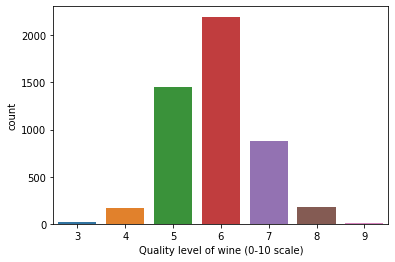

In [30]:

# Visualization  with countplots and factorplots
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

call(countplots)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')




In [34]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["sulphates", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
call(log_regression)

----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[218  89]
 [ 94 239]]
Accuracy: 0.7140625
Score: 0.7140625
RMSE: 0.534731240905186

White Wine

Confusion Matrix:
 [[ 302  351]
 [ 230 1077]]
Accuracy: 0.7035714285714286
Score: 0.7035714285714286
RMSE: 0.5444525428617002
